Original Data:
             Timestamp  Temperature (°C)  Humidity (%)
0  2024-09-05 20:59:29               NaN     48.099998
1  2024-09-05 20:59:36               NaN     48.000000
2  2024-09-05 20:59:37              21.6           NaN
3  2024-09-05 20:59:39              21.5           NaN
4  2024-09-05 20:59:43               NaN     47.900002
Data cleaned and saved to sensor_data_cleaned.csv
Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 1231 entries, 2 to 1232
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Timestamp         1231 non-null   datetime64[ns]
 1   Temperature (°C)  1231 non-null   float64       
 2   Humidity (%)      1231 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 38.5 KB
None


C:\Users\dinul\AppData\Local\Temp\ipykernel_17432\2633269541.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # or use method='bfill' for backward fill


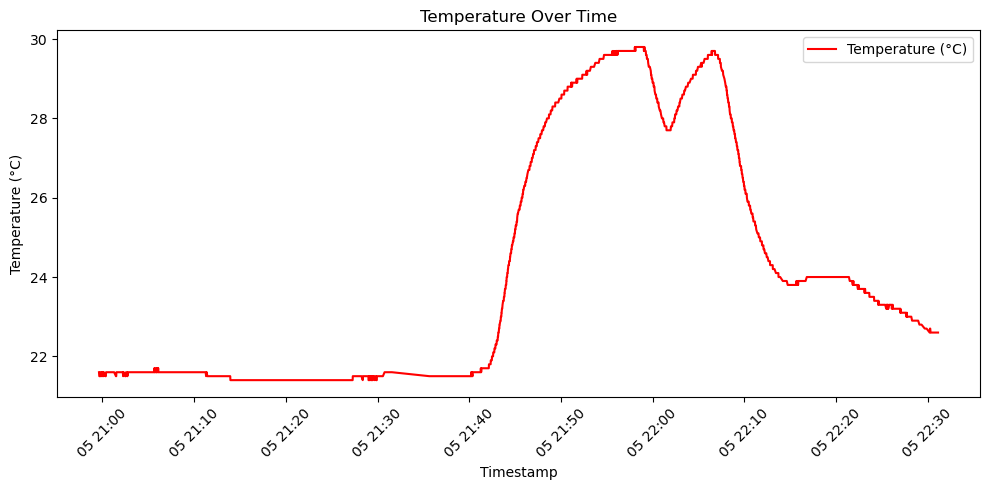

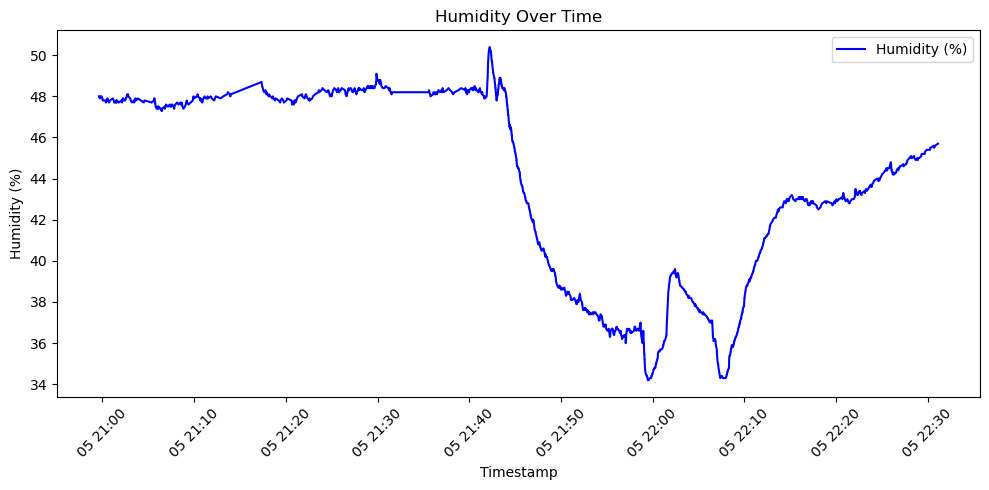

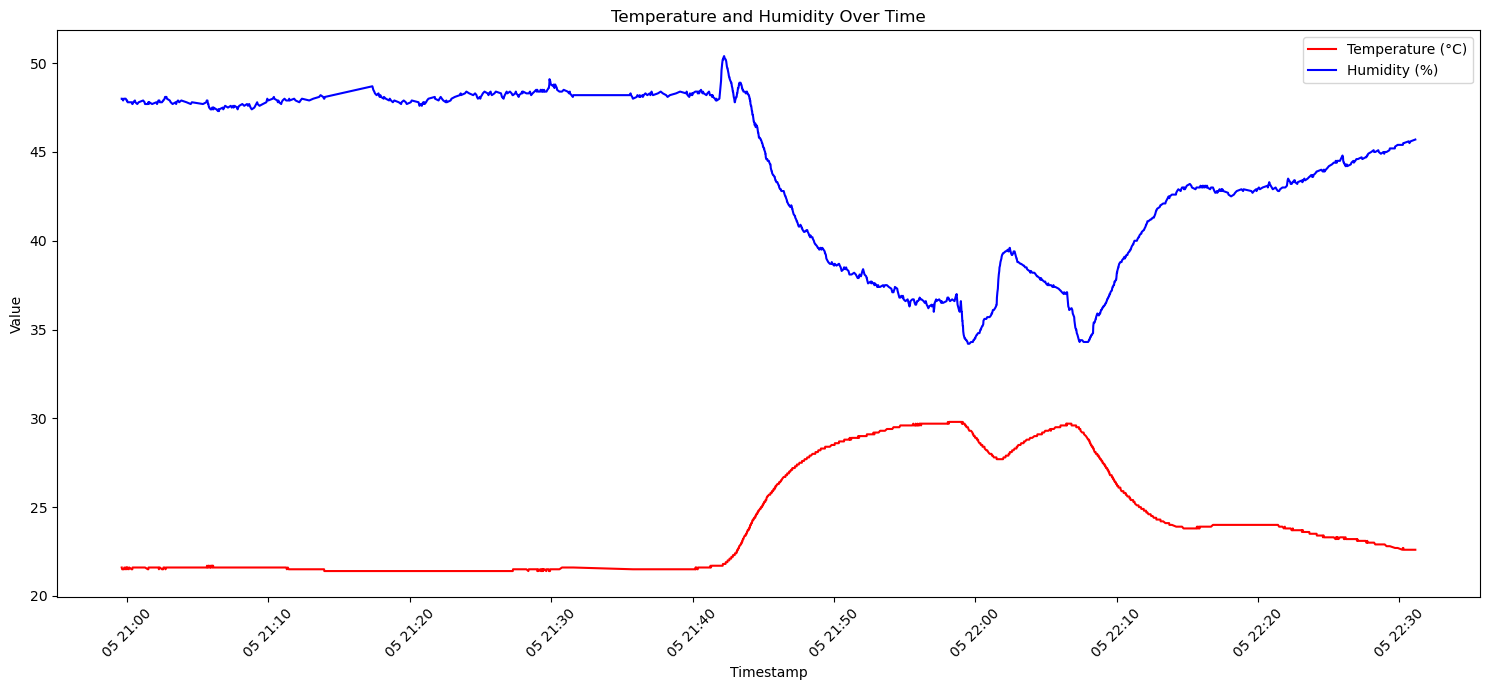

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure inline plotting in Jupyter Notebook
%matplotlib inline

# Load the data
df = pd.read_csv('6.1.csv')
print("Original Data:")
print(df.head())

# Convert the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort the DataFrame by Timestamp
df.sort_values('Timestamp', inplace=True)

# Forward fill missing values
df.fillna(method='ffill', inplace=True)  # or use method='bfill' for backward fill

# Optionally, remove rows with unrealistic values
df = df[(df['Temperature (°C)'] >= -40) & (df['Temperature (°C)'] <= 80)]
df = df[(df['Humidity (%)'] >= 0) & (df['Humidity (%)'] <= 100)]

# Save cleaned data
df.to_csv('6.1_cleaned.csv', index=False)

print("Data cleaned and saved to sensor_data_cleaned.csv")
print("Cleaned Data Summary:")
print(df.info())

# Plot Temperature
plt.figure(figsize=(10,5))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature (°C)', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plot Humidity
plt.figure(figsize=(10,5))
plt.plot(df['Timestamp'], df['Humidity (%)'], label='Humidity (%)', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Humidity (%)')
plt.title('Humidity Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Combined Plot
plt.figure(figsize=(15,7))
plt.plot(df['Timestamp'], df['Temperature (°C)'], label='Temperature (°C)', color='red')
plt.plot(df['Timestamp'], df['Humidity (%)'], label='Humidity (%)', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Temperature and Humidity Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
